In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stats.csv')
df

,Network Type,Dataset,accuracy,f1_sc,train_time,test_time
0,Naive Bayes,Combined,0.552897,0.466401,8.997296,0.000649
1,Naive Bayes,Reddit,0.513077,0.426024,7.331121,0.000612
2,Linear SVC,Combined,0.529346,0.516501,8.484201,0.000612
3,Linear SVC,Reddit,0.513077,0.509112,8.753423,0.000599
4,Simple NN,Combined,0.766729,0.766644,25.289036,0.000749
5,Simple NN,Reddit,0.824061,0.823587,19.920155,0.000711
6,Simple NN with dropout,Combined,0.785421,0.785294,23.763230,0.000745
7,Simple NN with dropout,Reddit,0.798859,0.797989,28.507914,0.000797
8,Simple NN with Batch Norm,Combined,0.776449,0.776347,27.928467,0.000870
9,Simple NN with Batch Norm,Reddit,0.800761,0.800758,30.044962,0.000801


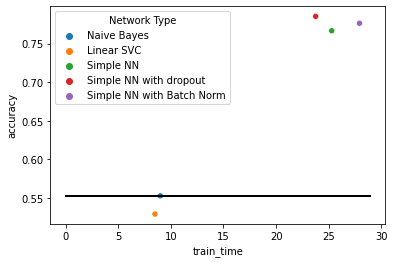

In [36]:
df_combined = df.query("Dataset == 'Combined'")
baseline = max(df_combined[df_combined['Network Type'] == "Naive Bayes"]['accuracy'].to_numpy()[0],
df_combined[df_combined['Network Type'] == "Linear SVC"]['accuracy'].to_numpy()[0])
plt.plot([0, df_combined['train_time'].max()+1], [baseline, baseline], 'k-', lw=2);
sns.scatterplot(data=df_combined, x="train_time", y="accuracy", hue="Network Type");


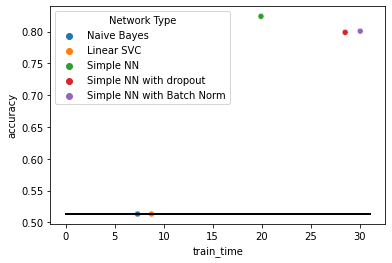

In [37]:
df_reddit = df.query("Dataset == 'Reddit'")
baseline = max(df_reddit[df_reddit['Network Type'] == "Naive Bayes"]['accuracy'].to_numpy()[0],
df_reddit[df_reddit['Network Type'] == "Linear SVC"]['accuracy'].to_numpy()[0])
plt.plot([0, df_reddit['train_time'].max()+1], [baseline, baseline], 'k-', lw=2);
sns.scatterplot(data=df_reddit, x="train_time", y="accuracy", hue="Network Type");

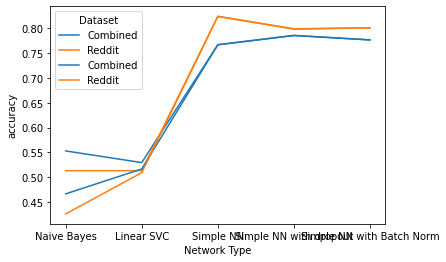

In [40]:
sns.lineplot(data=df, x="Network Type", y="accuracy", hue="Dataset");

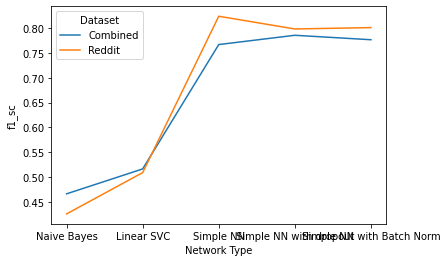

In [41]:
sns.lineplot(data=df, x="Network Type", y="f1_sc", hue="Dataset");